# 理论分析的图像

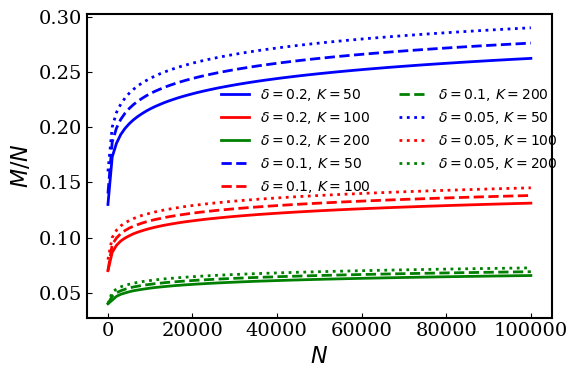

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#-------------------- 配置Matplotlib参数以接近期刊风格 --------------------

# 使用LaTeX字体渲染，以接近期刊排版样式
#mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=14)
mpl.rc('text.latex', preamble=r'\usepackage{amsmath,amssymb}')

# 设置线条参数
mpl.rc('lines', linewidth=2, markeredgewidth=1)

# 坐标轴的细节设置
mpl.rc('axes', labelsize=16, titlesize=16, linewidth=1.5)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

# 坐标刻度向内（更接近APS风格）
mpl.rc('xtick', direction='in')
mpl.rc('ytick', direction='in')

# 去掉图例边框
mpl.rc('legend', frameon=False)

#-------------------- 定义参数和函数 --------------------

N = np.linspace(100, 100000, 100)

# 要绘制的参数组合
delta_values = [0.2, 0.1, 0.05]
K_values = [50, 100, 200]

# 使用的线型和颜色方案
linestyles = {0.2: '-', 0.1: '--', 0.05:':'}    # delta=0.2使用实线，delta=0.1使用虚线
colors = {50: 'blue', 100: 'red', 200:'green'}        # K=1使用蓝色，K=2使用红色

def f(N, K, delta, M=None):
    if M is None: M=N
    return np.ceil((np.log(M / delta) / K) * N)

#-------------------- 绘图 --------------------

fig, ax = plt.subplots(figsize=(6,4))

for delta in delta_values:
    for K in K_values:
        f_values = f(N, K, delta)/N
        label = rf"$\delta={delta},\,K={K}$"
        ax.plot(N, f_values, label=label, linestyle=linestyles[delta], color=colors[K])

ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$M/N$")

# 添加图例并将其放置在图的上方
ax.legend(loc='upper center', bbox_to_anchor=(0.65, 0.80), ncol=2, fontsize=10)



plt.tight_layout(rect=[0, 0, 1, 1.00])

# 保存为PDF格式（矢量图）
plt.savefig("analy1.pdf", dpi=600)  # 在当前目录生成figure.pdf文件

plt.show()
